In [853]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
df_drug_neg = pd.read_csv("Project Data/ChCh-Miner_durgbank-chem-chem.tsv", sep="\t", header=None)
df_drug_neg

,0,1
0,DB00862,DB00966
1,DB00575,DB00806
2,DB01242,DB08893
3,DB01151,DB08883
4,DB01235,DB01275
...,...,...
48509,DB00542,DB01354
48510,DB00476,DB01239
48511,DB00621,DB01120
48512,DB00808,DB01356


In [3]:
df_rev = pd.DataFrame(df_drug_neg[[1,0]])
df_rev

,1,0
0,DB00966,DB00862
1,DB00806,DB00575
2,DB08893,DB01242
3,DB08883,DB01151
4,DB01275,DB01235
...,...,...
48509,DB01354,DB00542
48510,DB01239,DB00476
48511,DB01120,DB00621
48512,DB01356,DB00808


In [4]:
df_drug_neg_final = pd.concat((df_drug_neg, df_rev), ignore_index=True).sort_values(by=0).reset_index(drop=True)
df_drug_neg_final

,0,1
0,DB00005,DB08879
1,DB00005,DB08904
2,DB00005,DB00072
3,DB00005,DB00531
4,DB00005,DB06273
...,...,...
97023,DB09292,DB09477
97024,DB09330,DB09401
97025,DB09330,DB09570
97026,DB09330,DB09570


In [902]:
df_drug_vocab = pd.read_csv("Project Data/drugbank vocabulary.csv")
df_drug_vocab['Synonyms'] = df_drug_vocab['Common name'] + '|' + df_drug_vocab['Synonyms']
df_drug_vocab.drop(columns='Common name', inplace=True)
df_drug_vocab

,DrugBank ID,Accession Numbers,CAS,UNII,Synonyms,Standard InChI Key
0,DB00001,BTD00024 | BIOD00024,138068-37-8,Y43GF64R34,"Lepirudin|[Leu1, Thr2]-63-desulfohirudin | Des...",NaN
1,DB00002,BTD00071 | BIOD00071,205923-56-4,PQX0D8J21J,Cetuximab|Cetuximab | Cétuximab | Cetuximabum,NaN
2,DB00003,BTD00001 | BIOD00001,143831-71-4,953A26OA1Y,Dornase alfa|Deoxyribonuclease (human clone 18...,NaN
3,DB00004,BTD00084 | BIOD00084,173146-27-5,25E79B5CTM,Denileukin diftitox|Denileukin | Denileukin di...,NaN
4,DB00005,BTD00052 | BIOD00052,185243-69-0,OP401G7OJC,Etanercept|Etanercept | etanercept-szzs | etan...,NaN
...,...,...,...,...,...,...
16576,DB18713,NaN,NaN,NaN,Recombinant stabilized RSV A prefusion F antig...,NaN
16577,DB18714,NaN,NaN,NaN,Recombinant stabilized RSV B prefusion F antig...,NaN
16578,DB18715,NaN,1971920-73-6,8CZ82ZYY9X,"Tolebrutinib|2h-imidazo(4,5-c)pyridin-2-one, 4...",KOEUOFPEZFUWRF-LJQANCHMSA-N
16579,DB18716,NaN,1001404-83-6,80VUN7L00C,"Enmetazobactam|(2s,3s,5r)-3-methyl-3-((3-methy...",HFZITXBUTWITPT-YWVKMMECSA-N


In [903]:
df_uci_train = pd.read_csv("Project Data/drugsComTrain_raw.csv")
df_uci_train

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [1168]:
df_uci_train[df_uci_train.drugName=='Erythromycin']

,uniqueID,drugName,condition,review,rating,date,usefulCount
6637,126857,Erythromycin,Upper Respiratory Tract In...,"""I was prescribed this med...",9,15-Nov-09,31
18659,126861,Erythromycin,Upper Respiratory Tract In...,"""I was prescribed to take ...",8,20-Nov-08,32
30442,126846,Erythromycin,Dental Abscess,"""I&#039;m currently taking...",2,4-Jan-14,25
39198,126841,Erythromycin,Upper Respiratory Tract In...,"""I am taking LOFEPRAMINE a...",1,16-Jul-16,1
40504,126849,Erythromycin,Dental Abscess,"""I was put on erythromycin...",1,30-Jun-12,26
43835,126858,Erythromycin,Upper Respiratory Tract In...,"""I have been diagnosed wit...",10,16-Oct-09,17
45883,202824,Erythromycin,"Conjunctivitis, Bacterial","""I prefer the drops to the...",8,2-Jan-14,12
55699,126856,Erythromycin,Pharyngitis,"""I have been poorly for 3 ...",6,30-Mar-10,6
72034,126855,Erythromycin,Pharyngitis,"""My experience at first wa...",10,5-Apr-10,6
74106,126860,Erythromycin,Bronchitis,"""I&#039;ve always had good...",7,26-Sep-09,36


In [904]:
df_drug_vocab['Synonyms'] = df_drug_vocab['Synonyms'].str.split('|')
df_drug_vocab_exploded = df_drug_vocab.explode('Synonyms')
df_drug_vocab_exploded['Synonyms'] = df_drug_vocab_exploded['Synonyms'].str.strip() 
df_drug_vocab_exploded = df_drug_vocab_exploded.drop_duplicates(subset=['DrugBank ID','Synonyms'])
df_drug_vocab_exploded[df_drug_vocab_exploded.Synonyms=='Etanercept']

,DrugBank ID,Accession Numbers,CAS,UNII,Synonyms,Standard InChI Key
4,DB00005,BTD00052 | BIOD00052,185243-69-0,OP401G7OJC,Etanercept,NaN


In [905]:
df_drug_vocab_exploded[df_drug_vocab_exploded['Synonyms']=='Valsartan']

,DrugBank ID,Accession Numbers,CAS,UNII,Synonyms,Standard InChI Key
166,DB00177,APRD00133,137862-53-4,80M03YXJ7I,Valsartan,ACWBQPMHZXGDFX-QFIPXVFZSA-N


In [915]:
df_uci_train_updated = pd.merge(df_uci_train, df_drug_vocab_exploded[['Synonyms', 'DrugBank ID']], left_on="drugName", right_on="Synonyms").drop(columns='Synonyms')
df_uci_train_updated.sort_values(by='DrugBank ID')

,uniqueID,drugName,condition,review,rating,date,usefulCount,DrugBank ID
73782,18312,Cetuximab,Colorectal Cance,"""I have stage 4 colon cancer with liver mets. ...",9,28-Dec-16,2,DB00002
73781,18318,Cetuximab,Colorectal Cance,"""I have Stage 4 colorectal cancer with mets to...",8,1-Jun-11,47,DB00002
73780,18315,Cetuximab,Squamous Cell Carcinoma,"""Taking for inoperable squamous cell thyroid. ...",7,6-Oct-13,8,DB00002
73779,18316,Cetuximab,Colorectal Cance,"""Was also diagnosed with stage four colon canc...",8,19-Sep-13,7,DB00002
73778,18314,Cetuximab,Head and Neck Cance,"""I heard good things about this drug for metas...",1,16-Oct-15,1,DB00002
...,...,...,...,...,...,...,...,...
71533,215349,Senna,Constipation,"""I have constipation regularly. Milk of magnes...",10,3-Oct-17,3,DB15889
71532,215342,Senna,Constipation,"""I use this for 2 days before I was able to p...",6,2-Dec-17,0,DB15889
71531,215406,Senna,Constipation,"""Easy to use. No pain just gentle comfort. Exc...",10,26-Jan-10,65,DB15889
71562,215394,Senna,Constipation,"""Took only one tablet (directions said to take...",5,21-Sep-15,34,DB15889


In [1149]:
df_uci_train_updated[df_uci_train_updated.drugName=='Etanercept']

,uniqueID,drugName,condition,review,rating,date,usefulCount,DBID
11140,41928,Etanercept,Rheumatoid Arthritis,"""I live in Western Austral...",10,16-Sep-17,4,DB00005
11141,12780,Etanercept,Ankylosing Spondylitis,"""I started using Enbrel tw...",10,5-Nov-09,22,DB00005
11142,12651,Etanercept,Ankylosing Spondylitis,"""I am 35 years old and hav...",9,8-Oct-16,5,DB00005
11143,12764,Etanercept,Ankylosing Spondylitis,"""I was diagnosed with anky...",10,18-Jul-12,34,DB00005
11144,12733,Etanercept,Rheumatoid Arthritis,"""I&#039;ve had RA for 8 ye...",10,22-Nov-15,39,DB00005
...,...,...,...,...,...,...,...,...
11287,41942,Etanercept,Rheumatoid Arthritis,"""Enbrel has done a fantast...",10,18-Mar-17,14,DB00005
11288,12684,Etanercept,Plaque Psoriasis,"""Enbrel worked fantastic w...",8,6-Oct-13,38,DB00005
11289,41945,Etanercept,Behcet's Disease,"""I&#039;ve been on this dr...",8,10-Feb-17,0,DB00005
11290,12843,Etanercept,Psoriasis,"""I have been on Enbrel for...",9,5-Aug-10,9,DB00005


In [917]:
df_uci_train_updated.dropna(inplace=True)
df_uci_train_updated.rename(columns={'DrugBank ID': 'DBID'}, inplace=True)
df_uci_train_updated

,uniqueID,drugName,condition,review,rating,date,usefulCount,DBID
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,DB00177
1,206546,Valsartan,High Blood Pressure,"""I took Diovan for two months to reduce blood ...",6,22-Mar-09,40,DB00177
2,206572,Valsartan,High Blood Pressure,"""Been on Diovan for 9 years. Started with ring...",6,8-Nov-09,14,DB00177
3,206538,Valsartan,High Blood Pressure,"""I was prescribed Valsartan (generic of Diovan...",4,26-Apr-16,46,DB00177
4,206462,Valsartan,High Blood Pressure,"""Experience tiredness, no energy.""",8,13-Feb-12,118,DB00177
...,...,...,...,...,...,...,...,...
74783,881,Clemastine,Allergic Rhinitis,"""I have used this medicine for a number of yea...",10,27-Jan-10,11,DB00283
74784,148324,Valganciclovir,CMV Prophylaxis,"""Valgan takes care of cmv well I had a spk tra...",8,25-Oct-16,2,DB01610
74785,4237,Acarbose,"Diabetes, Type 2","""I took acarbose for 2 months. It did nothing ...",1,4-Jun-16,4,DB00284
74786,20575,Zileuton,"Asthma, Maintenance","""I was given this for Allergic rhinitis . I go...",1,8-Jun-16,2,DB00744


In [918]:
df_drug_neg_temp = pd.merge(df_drug_neg_final, df_uci_train_updated[['drugName', 'DBID']], left_on=1, right_on='DBID').drop(columns=['DBID',0])
df_drug_map = df_drug_neg_temp.groupby([1,'drugName']).count().reset_index()
df_drug_map = dict(zip(df_drug_map[1], df_drug_map['drugName']))

df_drug_map

{'DB00014': 'Goserelin',
 'DB00026': 'Anakinra',
 'DB00030': 'Insulin regular',
 'DB00046': 'Insulin lispro',
 'DB00047': 'Insulin glargine',
 'DB00051': 'Adalimumab',
 'DB00065': 'Infliximab',
 'DB00072': 'Trastuzumab',
 'DB00073': 'Rituximab',
 'DB00083': 'OnabotulinumtoxinA',
 'DB00086': 'Streptokinase',
 'DB00087': 'Alemtuzumab',
 'DB00091': 'Cyclosporine',
 'DB00104': 'Octreotide',
 'DB00107': 'Oxytocin',
 'DB00108': 'Natalizumab',
 'DB00126': 'Vitamin C',
 'DB00159': 'Icosapent',
 'DB00175': 'Pravastatin',
 'DB00176': 'Fluvoxamine',
 'DB00177': 'Valsartan',
 'DB00178': 'Ramipril',
 'DB00181': 'Baclofen',
 'DB00182': 'Amphetamine',
 'DB00186': 'Lorazepam',
 'DB00188': 'Bortezomib',
 'DB00191': 'Phentermine',
 'DB00193': 'Tramadol',
 'DB00196': 'Fluconazole',
 'DB00199': 'Erythromycin',
 'DB00201': 'Caffeine',
 'DB00202': 'Succinylcholine',
 'DB00203': 'Sildenafil',
 'DB00204': 'Dofetilide',
 'DB00205': 'Pyrimethamine',
 'DB00206': 'Reserpine',
 'DB00207': 'Azithromycin',
 'DB00211

In [936]:
df_drug_neg_names = df_drug_neg_final.copy(deep=True)

df_drug_neg_names[0] = df_drug_neg_names[0].map(df_drug_map)
df_drug_neg_names[1] = df_drug_neg_names[1].map(df_drug_map)
df_drug_neg_names.dropna(inplace=True)
df_drug_neg_names

,0,1
886,Goserelin,Alogliptin
888,Goserelin,Ofloxacin
891,Goserelin,Quetiapine
892,Goserelin,Crizotinib
893,Goserelin,Amoxapine
...,...,...
96896,Umeclidinium,Methscopolamine
96964,Brexpiprazole,Rolapitant
96965,Brexpiprazole,Rolapitant
96996,Eluxadoline,Methscopolamine


In [919]:
df_uci_train_final = pd.merge(df_uci_train_updated, df_drug_neg_final, left_on='DBID', right_on=0).drop(columns=0)
df_uci_train_final['DBID'] = df_uci_train_final['DBID'].map(df_drug_map)
df_uci_train_final[1] = df_uci_train_final[1].map(df_drug_map)
df_uci_train_final

,uniqueID,drugName,condition,review,rating,date,usefulCount,DBID,1
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Valsartan,NaN
1,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Valsartan,NaN
2,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Valsartan,Azilsartan medoxomil
3,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Valsartan,Piroxicam
4,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Valsartan,Labetalol
...,...,...,...,...,...,...,...,...,...
9747449,173878,Oxytocin,Labor Induction,"""They used Pitocin to induce all of my three l...",10,15-Aug-14,16,Oxytocin,Misoprostol
9747450,173878,Oxytocin,Labor Induction,"""They used Pitocin to induce all of my three l...",10,15-Aug-14,16,Oxytocin,Dinoprostone
9747451,173878,Oxytocin,Labor Induction,"""They used Pitocin to induce all of my three l...",10,15-Aug-14,16,Oxytocin,Mifepristone
9747452,173878,Oxytocin,Labor Induction,"""They used Pitocin to induce all of my three l...",10,15-Aug-14,16,Oxytocin,NaN


In [920]:
df_uci_train_final.dropna(inplace=True)
df_uci_train_final

,uniqueID,drugName,condition,review,rating,date,usefulCount,DBID,1
2,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Valsartan,Azilsartan medoxomil
3,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Valsartan,Piroxicam
4,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Valsartan,Labetalol
5,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Valsartan,Pindolol
6,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Valsartan,Metolazone
...,...,...,...,...,...,...,...,...,...
9747448,173878,Oxytocin,Labor Induction,"""They used Pitocin to induce all of my three l...",10,15-Aug-14,16,Oxytocin,Dinoprostone
9747449,173878,Oxytocin,Labor Induction,"""They used Pitocin to induce all of my three l...",10,15-Aug-14,16,Oxytocin,Misoprostol
9747450,173878,Oxytocin,Labor Induction,"""They used Pitocin to induce all of my three l...",10,15-Aug-14,16,Oxytocin,Dinoprostone
9747451,173878,Oxytocin,Labor Induction,"""They used Pitocin to induce all of my three l...",10,15-Aug-14,16,Oxytocin,Mifepristone


In [921]:
df_uci_train_final.columns

Index([   'uniqueID',    'drugName',   'condition',      'review',
            'rating',        'date', 'usefulCount',        'DBID',
                   1],
      dtype='object')

In [923]:
# Aggregating related DrugIDs into a list
aggregated_df = df_uci_train_final.groupby(['uniqueID','drugName','condition','review','rating','date',
                                            'usefulCount']).agg({
    1: lambda x: -1*len(list(x))
})

# Output the final DataFrame
aggregated_df = aggregated_df.reset_index()
aggregated_df.rename(columns={1:'negDrugNo'}, inplace=True)
aggregated_df

,uniqueID,drugName,condition,review,rating,date,usefulCount,negDrugNo
0,766,Phenylephrine,Eye Redness,"""Best eye drop I ever tried. Provided soothing...",10,17-Apr-16,0,-68
1,767,Silodosin,Benign Prostatic Hyperplasia,"""Really not sure why my urologist gave me samp...",1,2-Apr-16,28,-22
2,768,Silodosin,Benign Prostatic Hyperplasia,"""It reduces urination frequency but has a very...",2,2-Mar-16,18,-22
3,773,Silodosin,Benign Prostatic Hyperplasia,"""Having trouble emptying bladder so doc gave R...",4,19-Sep-15,21,-22
4,777,Silodosin,Benign Prostatic Hyperplasia,"""I&#039;m 65 and have had weak flow for years....",5,13-May-15,44,-22
...,...,...,...,...,...,...,...,...
64757,232220,Paroxetine,Anxiety and Stress,"""I took the lowest dose 10mg. The first two da...",1,22-Nov-15,27,-244
64758,232221,Paroxetine,Hot Flashes,"""I had been taking Sertraline for anxiety. Sta...",8,20-Nov-15,11,-244
64759,232223,Paroxetine,Generalized Anxiety Disorde,"""I&#039;ve been on Paxil for about two months....",5,18-Nov-15,11,-244
64760,232224,Paroxetine,Anxiety,"""I took this about 3 years ago for a massive m...",1,18-Nov-15,14,-244


In [924]:
aggregated_df[aggregated_df.drugName=='Abiraterone']

,uniqueID,drugName,condition,review,rating,date,usefulCount,negDrugNo
50785,188800,Abiraterone,Prostate Cance,"""effectiveness lasted 8 months side effects un...",4,15-Nov-17,0,-24
50786,188802,Abiraterone,Prostate Cance,"""Very satisfied with this drug. PSA dropped fr...",9,23-Dec-16,7,-24
50787,188805,Abiraterone,Prostate Cance,"""Began Zytiga with Prednisone 4/23/14 when con...",10,31-May-15,17,-24
50788,188808,Abiraterone,Prostate Cance,"""Have taken Zytiga for a year now, one pill ea...",10,7-Apr-14,36,-24
50789,188809,Abiraterone,Prostate Cance,"""PSA went from 19 to 9 in 3 weeks. No signifi...",10,27-Oct-13,33,-24
50790,188810,Abiraterone,Prostate Cance,"""On Zytiga for 6 months no side effects so far...",10,9-Jun-13,57,-24
50791,188811,Abiraterone,Prostate Cance,"""One month later- PSA is 0.16! Sure, it&#039;...",10,26-Apr-13,47,-24
50792,188812,Abiraterone,Prostate Cance,"""PSA dropped from 7.46 to 0.34 in 30 days. L...",10,5-Apr-13,53,-24
50793,188813,Abiraterone,Prostate Cance,"""PSA 28 to 4 in one week. Fatigue only side ef...",9,9-Aug-11,110,-24


In [925]:
aggregated_df['usefulCount'] = aggregated_df['usefulCount'].replace(0,1)
aggregated_df

,uniqueID,drugName,condition,review,rating,date,usefulCount,negDrugNo
0,766,Phenylephrine,Eye Redness,"""Best eye drop I ever tried. Provided soothing...",10,17-Apr-16,1,-68
1,767,Silodosin,Benign Prostatic Hyperplasia,"""Really not sure why my urologist gave me samp...",1,2-Apr-16,28,-22
2,768,Silodosin,Benign Prostatic Hyperplasia,"""It reduces urination frequency but has a very...",2,2-Mar-16,18,-22
3,773,Silodosin,Benign Prostatic Hyperplasia,"""Having trouble emptying bladder so doc gave R...",4,19-Sep-15,21,-22
4,777,Silodosin,Benign Prostatic Hyperplasia,"""I&#039;m 65 and have had weak flow for years....",5,13-May-15,44,-22
...,...,...,...,...,...,...,...,...
64757,232220,Paroxetine,Anxiety and Stress,"""I took the lowest dose 10mg. The first two da...",1,22-Nov-15,27,-244
64758,232221,Paroxetine,Hot Flashes,"""I had been taking Sertraline for anxiety. Sta...",8,20-Nov-15,11,-244
64759,232223,Paroxetine,Generalized Anxiety Disorde,"""I&#039;ve been on Paxil for about two months....",5,18-Nov-15,11,-244
64760,232224,Paroxetine,Anxiety,"""I took this about 3 years ago for a massive m...",1,18-Nov-15,14,-244


In [1165]:
aggregated_df[aggregated_df_update.drugName=='Erythromycin']

,uniqueID,drugName,condition,review,rating,date,usefulCount,negDrugNo
30954,132451,AbobotulinumtoxinA,Cervical Dystonia,"""I receive Dysport inj&#03...",8,14-Aug-14,9,-144
30955,132452,AbobotulinumtoxinA,acial Wrinkles,"""Experienced dizziness and...",5,13-Feb-14,11,-144
30956,132454,Doxepin,Anxiety,"""Started on Doxepin 100mg ...",7,2-Dec-17,1,-50
30957,132455,Doxepin,Depression,"""I took this as prescribed...",10,1-Dec-17,1,-50
30958,132458,Doxepin,Anxiety,"""Had to stop it because of...",3,21-Oct-17,2,-50
30959,132460,Doxepin,Anxiety,"""Honestly, a very good dru...",9,28-Sep-17,2,-50
30960,132461,Doxepin,Anxiety,"""Hi milemile I have been o...",9,24-Sep-17,4,-50
30961,132462,Doxepin,Insomnia,"""Use to take Ambien but si...",10,17-Sep-17,23,-50
30962,132465,Doxepin,Insomnia,"""changed my life - I now s...",10,1-Aug-17,23,-50
30963,132466,Doxepin,Insomnia,"""Doxepin does not help me ...",4,28-Jul-17,15,-50


In [927]:
df_drug_eff = pd.read_csv("Project Data/Drug_clean.csv")
df_drug_eff

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX
...,...,...,...,...,...,...,...,...,...,...
680,vulvovaginal candidiasis,Miconazole,3.465000,2.770000,Cream,On Label,13.990000,19.500000,2.345000,RX/OTC
681,vulvovaginal candidiasis,Miconazole,4.750000,3.000000,Cream,On Label,13.990000,4.000000,3.000000,OTC
682,vulvovaginal candidiasis,Miconazole,4.000000,1.000000,Other,On Label,125.990000,1.000000,1.000000,OTC
683,vulvovaginal candidiasis,Terconazole,3.525000,3.047500,Cream,On Label,68.990000,20.000000,2.717500,RX


In [928]:
numerical_data = df_drug_eff.select_dtypes(include='number')
numerical_data['Drug'] = df_drug_eff['Drug']

drug_group = numerical_data.groupby(by='Drug').mean().round(2).reset_index()

drug_group

,Drug,EaseOfUse,Effective,Price,Reviews,Satisfaction
0,ASA,3.00,2.60,17.99,6.00,2.80
1,Acebutolol,4.32,3.75,24.49,14.50,4.20
2,Acetaminophen,3.75,3.47,14.76,5.45,3.31
3,Acetazolamide,3.34,3.60,70.49,104.00,2.89
4,Acetohydroxamic,4.00,2.50,638.99,3.00,2.00
...,...,...,...,...,...,...
272,Valsartan,4.08,3.58,168.99,444.25,3.06
273,Verapamil,4.71,4.13,124.36,42.33,4.03
274,Vit,4.18,3.23,110.66,8.67,3.76
275,Zanamivir,2.35,2.12,81.99,10.00,2.00


In [929]:
final_df = pd.merge(aggregated_df, drug_group, left_on='drugName', right_on='Drug').drop(columns=['Drug'])
final_df['Price'] = -1*final_df['Price']
final_df.drop(columns='uniqueID', inplace=True)
final_df

,drugName,condition,review,rating,date,usefulCount,negDrugNo,EaseOfUse,Effective,Price,Reviews,Satisfaction
0,Phenylephrine,Eye Redness,"""Best eye drop I ever tried. Provided soothing...",10,17-Apr-16,1,-68,4.19,4.04,-65.05,2.22,3.50
1,Phenylephrine,mulation) (phenylephrine),"""Coming down with a cold and couldn&#039;t bre...",10,10-Oct-17,1,-68,4.19,4.04,-65.05,2.22,3.50
2,Phenylephrine,mulation) (phenylephrine),"""I caught a bad sinus infection/ congestion. T...",9,5-May-17,2,-68,4.19,4.04,-65.05,2.22,3.50
3,Phenylephrine,mulation) (phenylephrine),"""This product didn&#039;t make the slightest d...",1,10-Feb-17,3,-68,4.19,4.04,-65.05,2.22,3.50
4,Phenylephrine,Nasal Congestion,"""love it""",10,7-Feb-17,1,-68,4.19,4.04,-65.05,2.22,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
23720,Milnacipran,ibromyalgia,"""I was taking Cymbalta and decided to go off d...",6,26-Jun-09,22,-8,4.29,3.57,-477.99,9.00,3.57
23721,Milnacipran,ibromyalgia,"""I&#039;m on day 4, my pain level in limbs see...",8,19-Jun-09,37,-8,4.29,3.57,-477.99,9.00,3.57
23722,Milnacipran,ibromyalgia,"""I am more than half way through the starter p...",4,16-Jun-09,23,-8,4.29,3.57,-477.99,9.00,3.57
23723,Milnacipran,ibromyalgia,"""At first I took Cymbalta and it really helped...",9,15-Jun-09,72,-8,4.29,3.57,-477.99,9.00,3.57


In [965]:
pd.set_option('display.max_colwidth', 30)

In [1163]:
final_df[final_df.drugName=='Cedax']

,drugName,condition,review,rating,date,usefulCount,negDrugNo,EaseOfUse,Effective,Price,Reviews,Satisfaction


In [981]:
final_df.condition.unique()

array(['Eye Redness', 'mulation) (phenylephrine)', 'Nasal Congestion',
       'High Blood Pressure', 'Edema', 'Gout, Acute',
       'Bacterial Vaginitis', 'Rosacea', 'Perioral Dermatitis',
       'Bacterial Infection', 'Trichomoniasis', 'Dental Abscess',
       'Intraabdominal Infection', 'Diverticulitis',
       'Clostridial Infection', 'Giardiasis',
       'Pelvic Inflammatory Disease', 'Skin or Soft Tissue Infection',
       'Amebiasis', 'Helicobacter Pylori Infection', 'STD Prophylaxis',
       'Pseudomembranous Colitis', "Crohn's Disease, Acute",
       "Crohn's Disease, Maintenance", 'Surgical Prophylaxis',
       'Not Listed / Othe', 'Bone infection', 'Deep Neck Infection',
       'Supraventricular Tachycardia', 'Angina Pectoris Prophylaxis',
       'Atrial Flutte', 'Atrial Fibrillation', "Raynaud's Syndrome",
       'Bladder Infection', 'Sinusitis', 'Bronchitis',
       'Urinary Tract Infection', 'Otitis Media', 'Pneumonia',
       'Prevention of Bladder infection', 'Brain Tum'

In [1171]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def recommend_drugs_for_condition(condition, final_df, top_n=5):
    # Filter the dataset for the current condition
    condition_data = final_df[final_df['condition'] == condition]

    # Select relevant features
    features = condition_data[['rating', 'usefulCount', 'negDrugNo', 'EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction']]

    # Group by drugName and aggregate the numerical features
    aggregated_data = condition_data.groupby('drugName').agg({
        'rating': 'mean',
        'usefulCount': 'mean',
        'negDrugNo': 'mean',
        'EaseOfUse': 'mean',
        'Effective': 'mean',
        'Price': 'mean',
        'Reviews': 'mean',
        'Satisfaction': 'mean'
    }).reset_index()

    # Scale the aggregated features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(aggregated_data[['rating', 'usefulCount', 'negDrugNo', 'EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction']])
    print(features_scaled)
    
    # Apply SVD to reduce dimensionality
    svd = TruncatedSVD(n_components=5) # Choose the number of components
    features_reduced = svd.fit_transform(features_scaled)
    print(features_reduced)
    
    #similarity
    similarity_matrix = np.dot(features_reduced, features_reduced.T)
    
    print(similarity_matrix)

    # Find the mean similarity score with all other drugs for each drug
    mean_similarity = np.mean(similarity_matrix, axis=1)
    
    print(mean_similarity)
    
    # Get indices of top N similar drugs
    top_indices = np.argsort(mean_similarity)[-top_n:][::-1]

    # Retrieve the names of the top recommended drugs
    recommended_drugs = aggregated_data.iloc[top_indices]

    df_temp = pd.merge(recommended_drugs, df_drug_neg_names, left_on='drugName', right_on=0).drop(columns=0)

    df_merged = df_temp.groupby(['drugName', 'rating', 'usefulCount', 'negDrugNo', 'EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction']).agg({
        1: lambda x: ', '.join(x)
    }).reset_index()
    df_merged.rename(columns={1: 'negDrugNames'}, inplace=True)


    # Visualize explained variance ratio of each component
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(svd.explained_variance_ratio_)), svd.explained_variance_ratio_, color='skyblue', alpha=0.7)
    plt.xlabel('Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio of SVD Components')
    plt.xticks(range(len(svd.explained_variance_ratio_)))
    plt.grid(True)
    plt.show()
    
        # Cumulative explained variance
    plt.figure(figsize=(6, 4))
    plt.plot(np.cumsum(svd.explained_variance_ratio_), marker='o', linestyle='--', color='b')
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()

    # Visualize feature influence with radar chart
    features = features.columns.tolist()  # Extract feature names
    num_features = len(features)
    angles = np.linspace(0, 2*np.pi, num_features, endpoint=False).tolist()  # Angles for radar chart

    # Create radar chart for each component
    colors = plt.cm.viridis(np.linspace(0, 1, len(svd.components_)))
    for i in range(len(svd.components_)):
        plt.figure(figsize=(6, 4))
        component_weights = svd.components_[i].tolist()
        plt.subplot(111, polar=True)
        plt.xticks(angles, features, fontsize=6)  # Adjust fontsize for readability
        plt.yticks([-1, 0, 1], color='grey', alpha=0.7)  # Y-axis ticks
        color = colors[i]
        plt.plot(angles, component_weights, '-o', label=f'Component {i+1}', linewidth=2, color = color)
        # Add title and legend
        plt.title(f'Feature Influence on SVD Component {i+1} (Higher = More Influence)')
        plt.legend()
        plt.grid(True)

        # Mark values
        for j, (angle, weight) in enumerate(zip(angles, component_weights)):
            if weight < 0:
                plt.text(angle, weight, round(weight,2), ha='right', va='center')
            else:
                plt.text(angle, weight, round(weight,2), ha='left', va='center')
        plt.ylim(-1, 1)  # Fixing the y-axis limits
        plt.savefig("Project Data/SVD-Component"+condition+str(i)+".png")
        plt.show()

    # Merge with negative drug names
    df_temp = pd.merge(recommended_drugs, df_drug_neg_names, left_on='drugName', right_on=0).drop(columns=0)

    df_merged = df_temp.groupby(['drugName', 'rating', 'usefulCount', 'negDrugNo', 'EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction']).agg({
        1: lambda x: ', '.join(x)
    }).reset_index()
    df_merged.rename(columns={1: 'negDrugNames'}, inplace=True)

    return df_merged

In [1131]:
train_df, test_df = train_test_split(final_df, test_size=0.5, random_state=10)

[[-0.37252805  0.12609735 -0.62476641  1.00835441  0.40782893  0.18357358
   1.68808786 -0.30702446]
 [-0.23904573 -0.83593832  0.64492016 -0.06071244 -1.5180299   0.63043542
   0.91063956 -1.68863452]
 [ 1.77987433 -1.60277835  0.64492016 -0.10822652  1.3367726   0.80965612
  -1.30070266  1.19368992]
 [ 0.67864521 -0.68257032  0.70538143  1.76857973 -0.81565786 -0.00663102
  -1.44978191 -0.35466618]
 [-1.52381304  1.87356312  0.5844589   0.41442838  1.38208693 -2.55361533
  -0.45442945  1.69392804]
 [ 0.65111448 -0.70557552 -2.55952689 -0.27452581  0.58908623  0.38329757
   0.63956379  0.14557194]
 [-0.920759    0.37639925 -0.14107629 -1.15353633  0.22657163  0.8275965
  -0.50809798  0.55052661]
 [-0.91567159  0.88086772  0.5844589   0.20061501 -1.29145828 -0.64845716
   0.75746063 -1.14075467]
 [ 0.86218339  0.56993507  0.16123004 -1.79497644 -0.31720028  0.37414432
  -0.28273984 -0.09263669]]
[[ 0.09981872 -0.95051835  1.05626333 -1.38674621 -0.73604066]
 [-1.52973412 -2.11898158 -0

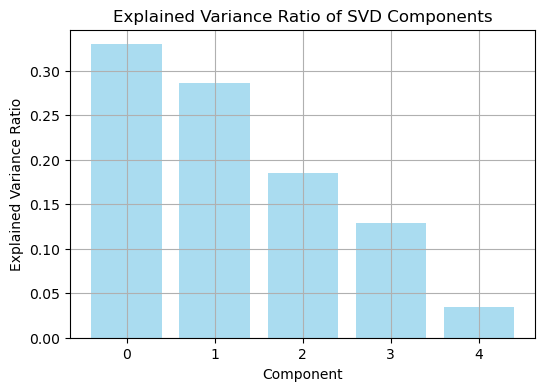

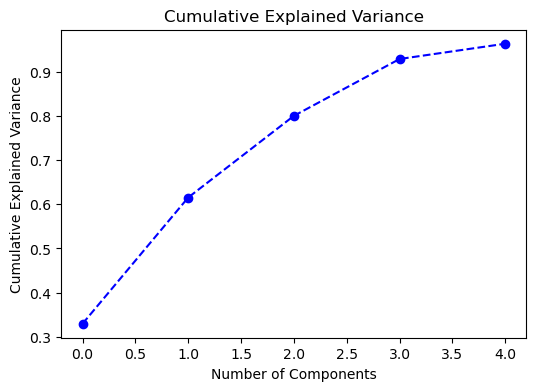

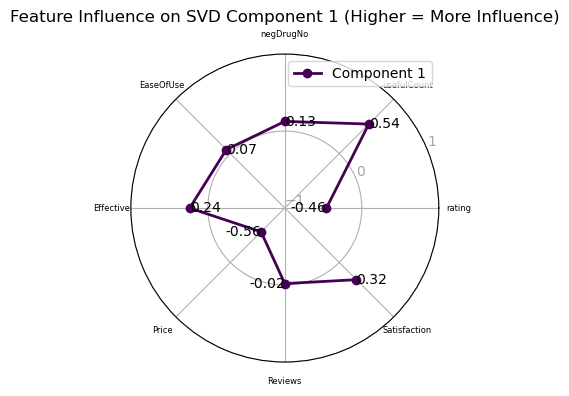

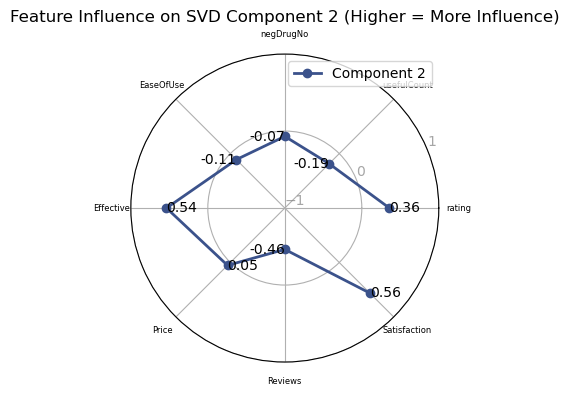

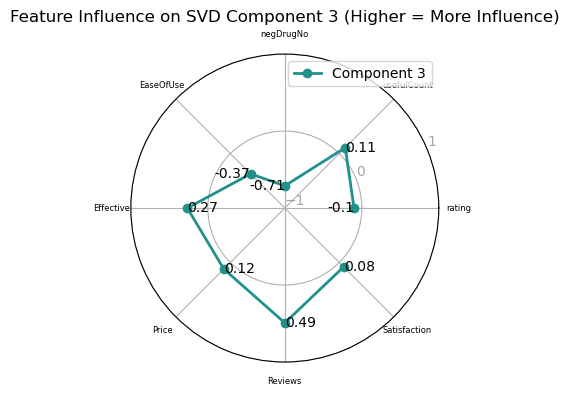

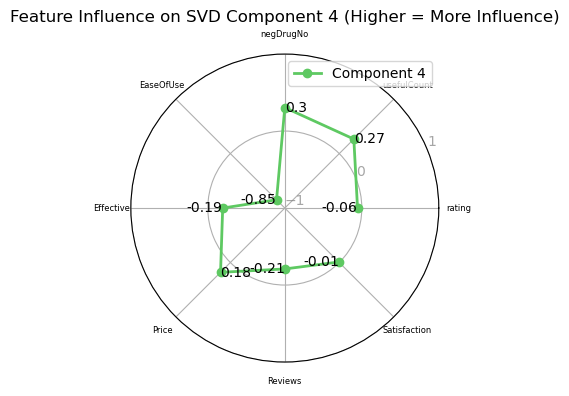

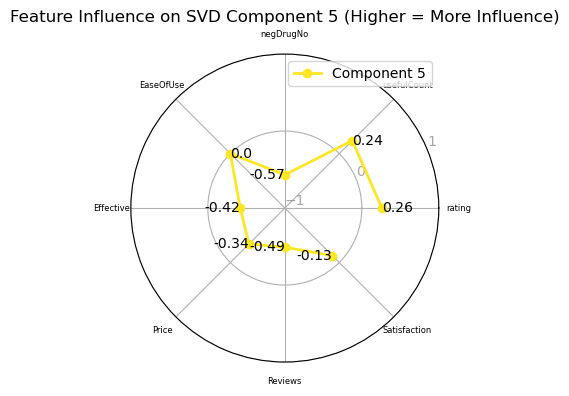

Recommended Drugs for Pneumonia:


,drugName,rating,usefulCount,negDrugNo,EaseOfUse,Effective,Price,Reviews,Satisfaction,negDrugNames
0,Cefuroxime,4.000000,28.666667,-8.0,3.76,3.64,-259.92,95.12,3.19,"Magnesium hydroxide, Calci..."
1,Doxycycline,5.095238,18.904762,-32.0,3.10,3.13,-75.22,90.80,2.71,"Magnesium oxide, Ampicilli..."
2,Moxifloxacin,8.333333,20.166667,-22.0,2.83,2.89,-99.99,108.94,2.44,"Mifepristone, Magnesium ox..."


In [1172]:
recommended_drugs = recommend_drugs_for_condition("Pneumonia", final_df, top_n=3)
print("Recommended Drugs for Pneumonia:")
display(recommended_drugs)

In [1133]:
recommended_drugs.to_csv("Project Data/results.csv", index=False)

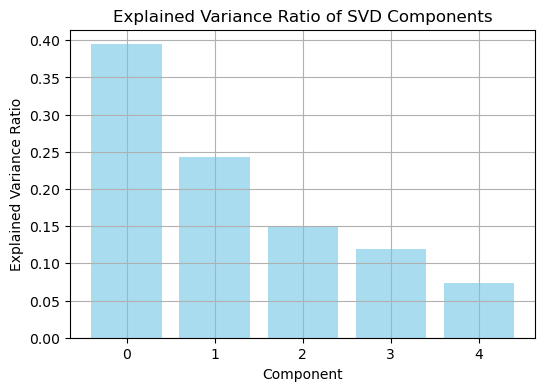

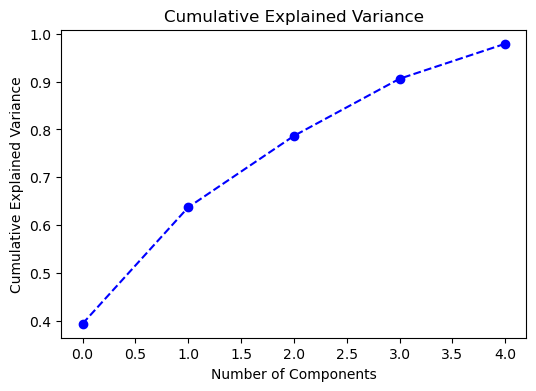

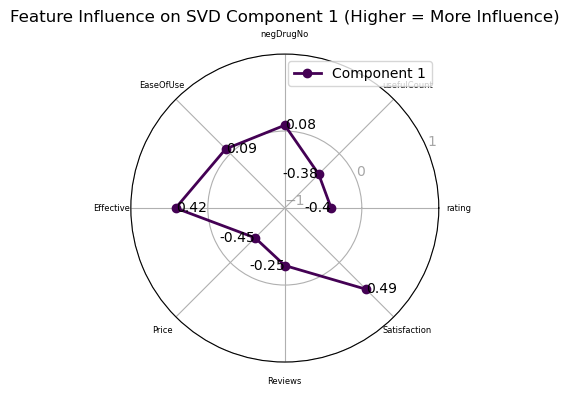

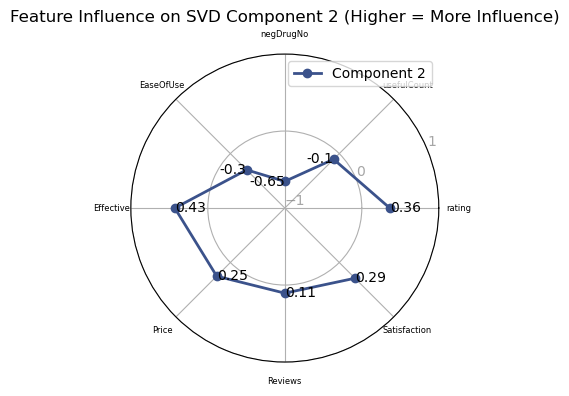

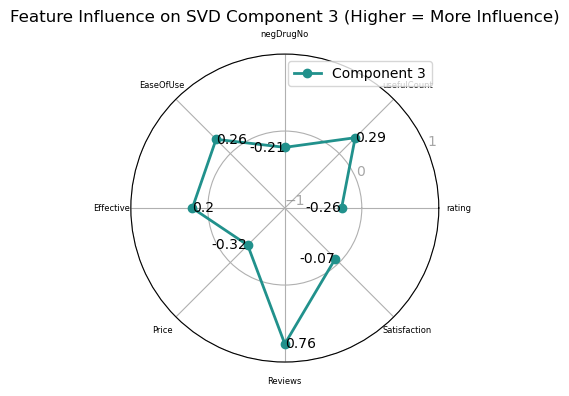

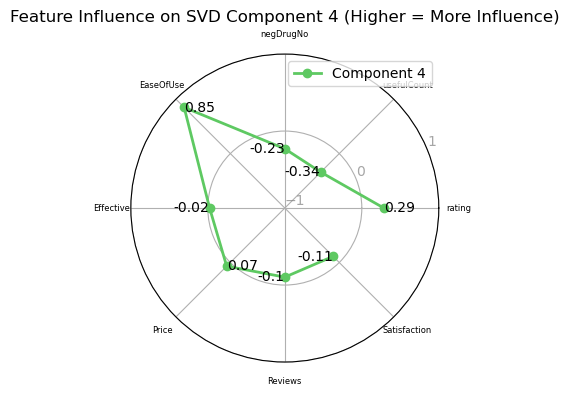

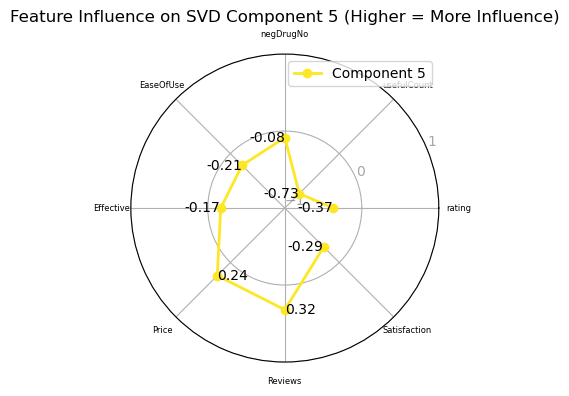

Recommended Drugs for Pneumonia:


,drugName,rating,usefulCount,negDrugNo,EaseOfUse,Effective,Price,Reviews,Satisfaction,negDrugNames
0,Cefuroxime,1.000000,6.000000,-8.0,3.76,3.64,-259.92,95.12,3.19,"Magnesium hydroxide, Calci..."
1,Clarithromycin,9.111111,11.111111,-112.0,3.47,3.29,-99.49,183.18,2.54,"Flibanserin, Retapamulin, ..."
2,Doxycycline,7.000000,12.666667,-32.0,3.10,3.13,-75.22,90.80,2.71,"Magnesium oxide, Ampicilli..."


In [1153]:
recommended_drugs = recommend_drugs_for_condition("Pneumonia", test_df, top_n=3)
print("Recommended Drugs for Pneumonia:")
display(recommended_drugs)

In [933]:
final_df.to_csv("Project Data/final_df.csv", index=False)

# IGNORE BELOW 

In [1175]:
grouped_data.to_csv("Project Data/grouped_data.csv", index=False)

In [1141]:
import pandas as pd

# Group data by 'drugName' and 'condition' and aggregate columns
grouped_data = final_df.groupby(by=['drugName', 'condition']).agg({
    'rating': 'mean',
    'usefulCount': 'mean',
    'negDrugNo': 'mean',
    'EaseOfUse': 'mean',
    'Effective': 'mean',
    'Reviews': 'mean',
    'Price': 'mean',
    'Satisfaction': 'mean'
}).reset_index()

grouped_data

,drugName,condition,rating,usefulCount,negDrugNo,EaseOfUse,Effective,Reviews,Price,Satisfaction
0,Acebutolol,High Blood Pressure,9.500000,13.000000,-44.0,4.32,3.75,14.50,-24.49,4.20
1,Acetaminophen,Muscle Pain,9.500000,29.000000,-76.0,3.75,3.47,5.45,-14.76,3.31
2,Acetaminophen,Pain,7.761905,11.666667,-76.0,3.75,3.47,5.45,-14.76,3.31
3,Acetaminophen,Sciatica,5.500000,10.000000,-76.0,3.75,3.47,5.45,-14.76,3.31
4,Acetaminophen,eve,9.600000,11.600000,-76.0,3.75,3.47,5.45,-14.76,3.31
...,...,...,...,...,...,...,...,...,...,...
1041,Verapamil,Arrhythmia,4.600000,10.800000,-210.0,4.71,4.13,42.33,-124.36,4.03
1042,Verapamil,Cluster Headaches,9.025641,21.743590,-210.0,4.71,4.13,42.33,-124.36,4.03
1043,Verapamil,High Blood Pressure,6.250000,20.500000,-210.0,4.71,4.13,42.33,-124.36,4.03
1044,Verapamil,Migraine Prevention,8.233333,42.000000,-210.0,4.71,4.13,42.33,-124.36,4.03


In [1154]:
grouped_data[grouped_data.condition=='Pneumonia'].sort_values('rating', ascending=False)


,drugName,condition,rating,usefulCount,negDrugNo,EaseOfUse,Effective,Reviews,Price,Satisfaction
152,Cefixime,Pneumonia,10.000000,6.000000,-6.0,3.54,3.62,27.00,-76.20,2.98
694,Moxifloxacin,Pneumonia,8.333333,20.166667,-22.0,2.83,2.89,108.94,-99.99,2.44
157,Cefpodoxime,Pneumonia,8.000000,12.000000,-4.0,4.33,2.67,15.00,-120.79,2.33
239,Clarithromycin,Pneumonia,7.950000,11.850000,-112.0,3.47,3.29,183.18,-99.49,2.54
141,Cefdinir,Pneumonia,6.333333,11.000000,-6.0,3.56,2.36,205.00,-85.99,1.77
110,Azithromycin,Pneumonia,6.090909,17.272727,-48.0,4.01,3.21,267.58,-110.40,2.35
552,Levofloxacin,Pneumonia,5.104478,22.194030,-8.0,3.67,2.46,192.67,-155.85,2.00
368,Doxycycline,Pneumonia,5.095238,18.904762,-32.0,3.10,3.13,90.80,-75.22,2.71
164,Cefuroxime,Pneumonia,4.000000,28.666667,-8.0,3.76,3.64,95.12,-259.92,3.19


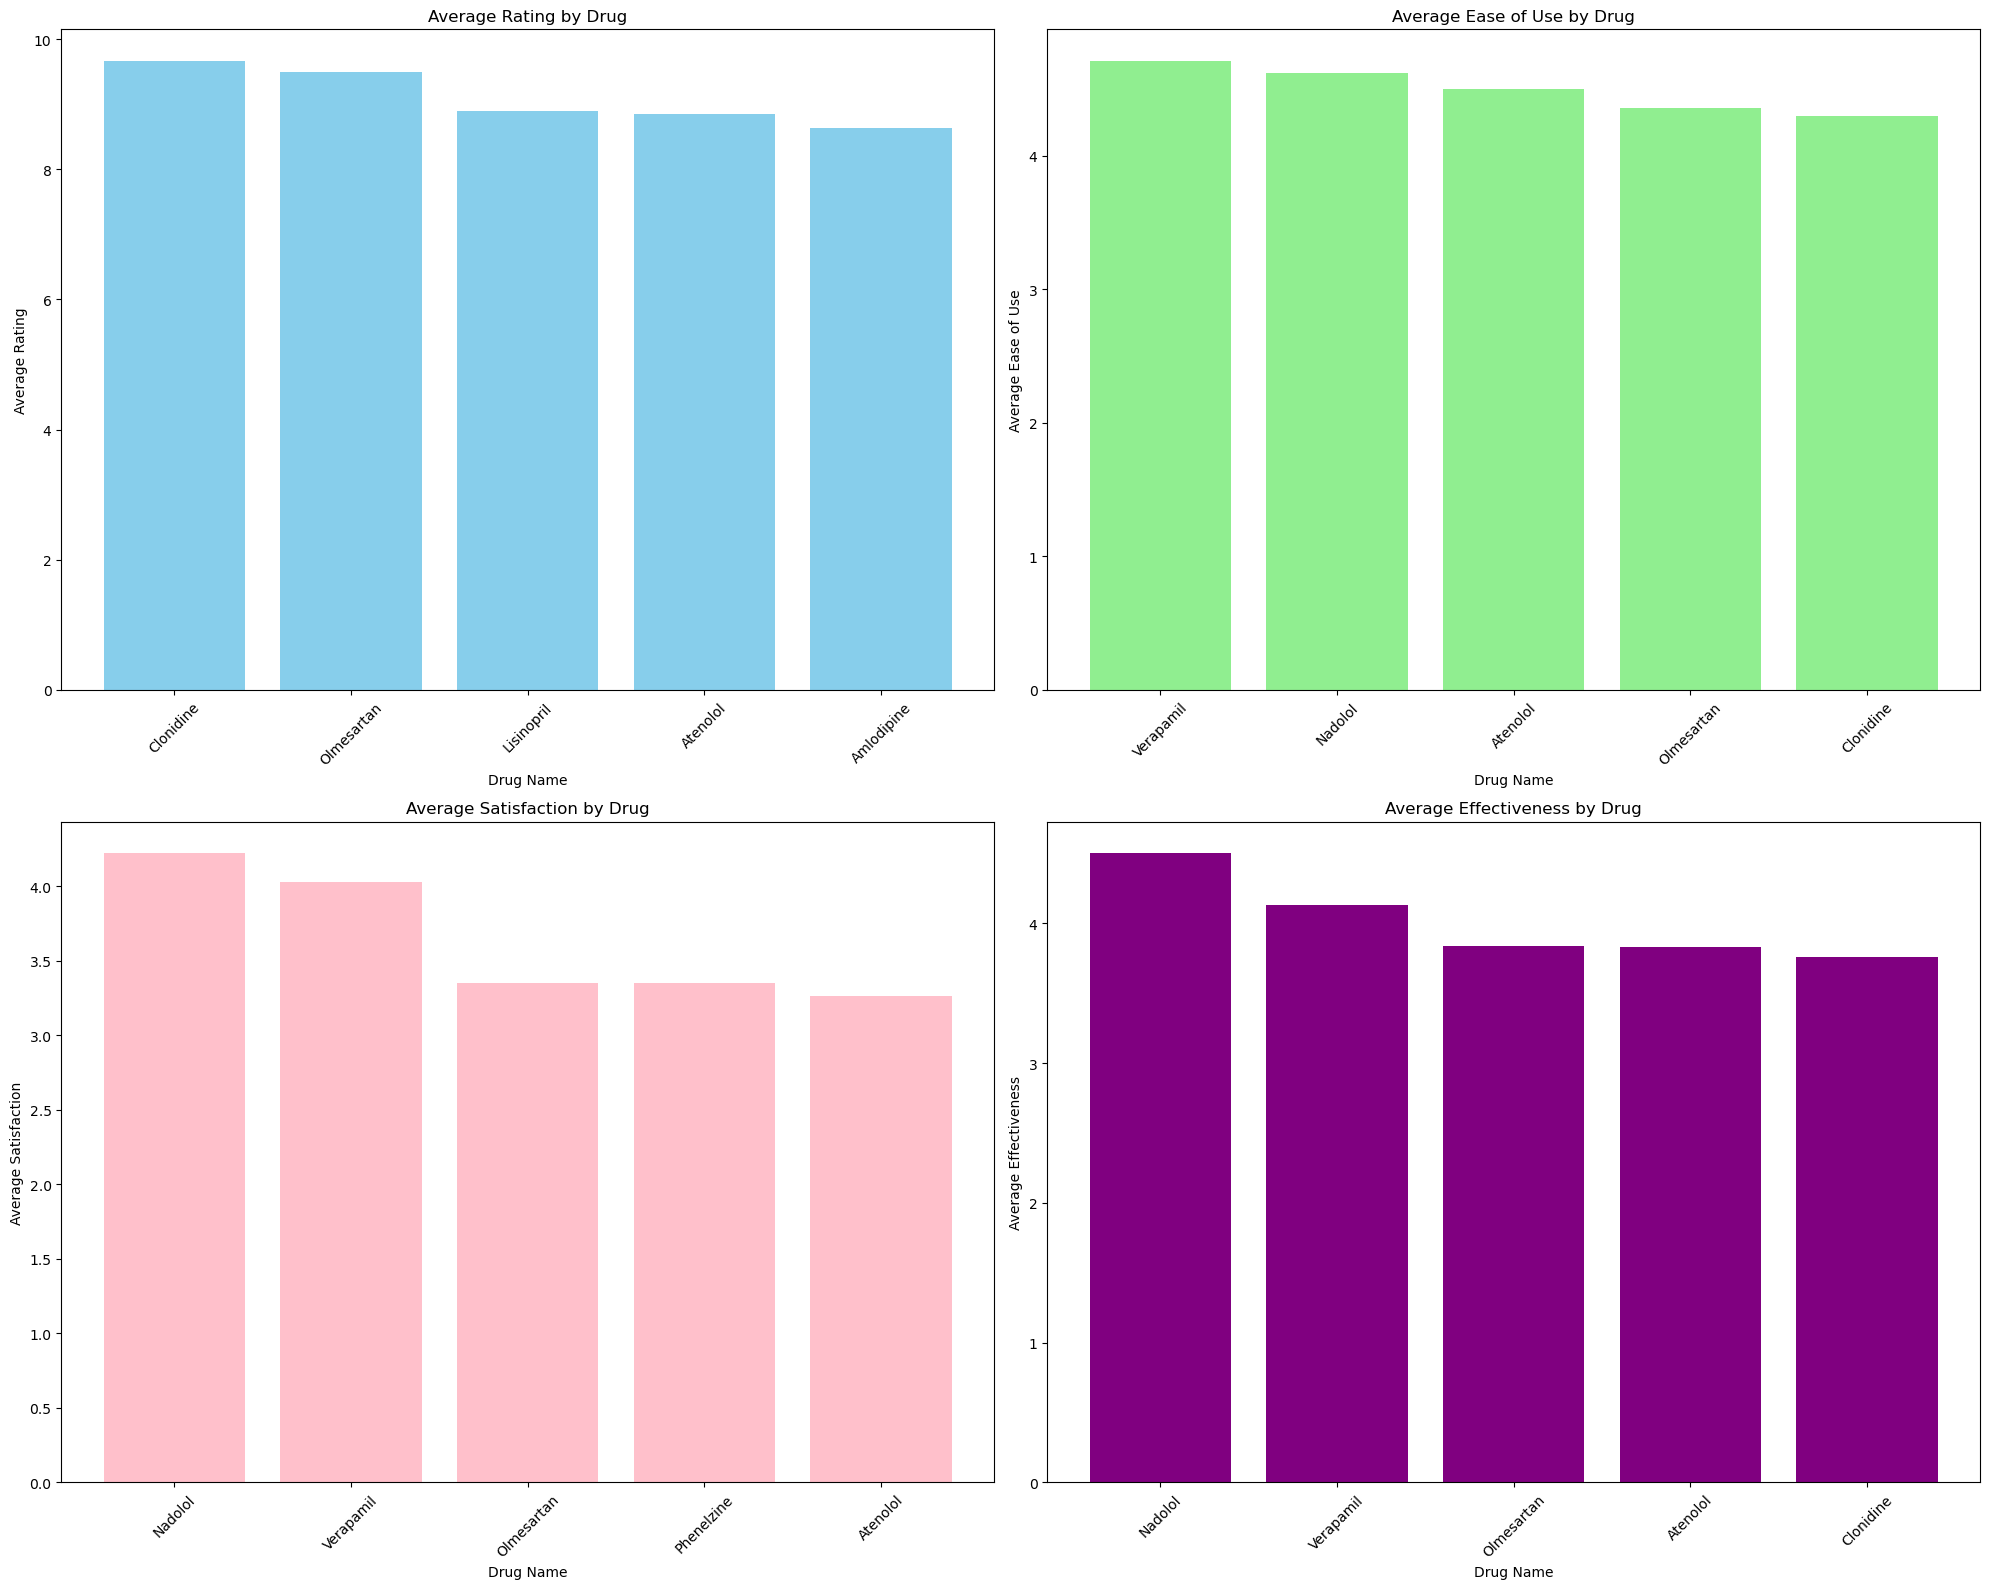

In [1108]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a subplot object with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Average Rating subplot
axes[0,0].bar(grouped_data.sort_values(by='rating', ascending=False)['drugName'][:5], grouped_data.sort_values(by='rating', ascending=False)['rating'][:5], color='skyblue')
axes[0,0].set_title('Average Rating by Drug')
axes[0,0].set_xlabel('Drug Name')
axes[0,0].set_ylabel('Average Rating')
axes[0,0].tick_params(axis='x', rotation=45)

# Useful Count subplot 
axes[0,1].bar(grouped_data.sort_values(by='EaseOfUse', ascending=False)['drugName'][:5], grouped_data.sort_values(by='EaseOfUse', ascending=False)['EaseOfUse'][:5], color='lightgreen')
axes[0,1].set_title('Average Ease of Use by Drug')
axes[0,1].set_xlabel('Drug Name')
axes[0,1].set_ylabel('Average Ease of Use')
axes[0,1].tick_params(axis='x', rotation=45)

# Average Rating subplot
axes[1,0].bar(grouped_data.sort_values(by='Satisfaction', ascending=False)['drugName'][:5], grouped_data.sort_values(by='Satisfaction', ascending=False)['Satisfaction'][:5], color='pink')
axes[1,0].set_title('Average Satisfaction by Drug')
axes[1,0].set_xlabel('Drug Name')
axes[1,0].set_ylabel('Average Satisfaction')
axes[1,0].tick_params(axis='x', rotation=45)

# Useful Count subplot 
axes[1,1].bar(grouped_data.sort_values(by='Effective', ascending=False)['drugName'][:5], grouped_data.sort_values(by='Effective', ascending=False)['Effective'][:5], color='purple')
axes[1,1].set_title('Average Effectiveness by Drug')
axes[1,1].set_xlabel('Drug Name')
axes[1,1].set_ylabel('Average Effectiveness')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()

# 
plt.show()


In [614]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Select numerical columns for PCA
numerical_cols = grouped_data.select_dtypes(include=np.number).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaled_data = scaler.fit_transform(grouped_data[numerical_cols])
Migraine
# Normalize the data
scaled_data = normalize(scaled_data)

# Perform PCA with the number of components set to 2
pca_2d = PCA(n_components=2)
pca_data_2d = pca_2d.fit_transform(scaled_data)

# Perform PCA with the number of components set to 3
pca_3d = PCA(n_components=3)
pca_data_3d = pca_3d.fit_transform(scaled_data)

# Create a new DataFrame with the PCA components
pca_df_2d = pd.DataFrame(pca_data_2d, columns=['PC1', 'PC2'])
pca_df_3d = pd.DataFrame(pca_data_3d, columns=['PC1', 'PC2', 'PC3'])

# Concatenate the PCA DataFrame with the original DataFrame for user condition
df_with_pca_2d = pd.concat([grouped_data[['condition','drugName']], pca_df_2d], axis=1)
df_with_pca_3d = pd.concat([grouped_data[['condition','drugName']], pca_df_3d], axis=1)

# Getting the most contributing features for each principal component
most_contributing_features_2d = pd.DataFrame(pca_2d.components_, columns=numerical_cols, index=['PC1', 'PC2'])
most_contributing_features_3d = pd.DataFrame(pca_3d.components_, columns=numerical_cols, index=['PC1', 'PC2', 'PC3'])

print("Most Contributing Features for 2D PCA:")
print(most_contributing_features_2d)

print("\nMost Contributing Features for 3D PCA:")
print(most_contributing_features_3d)

Most Contributing Features for 2D PCA:
       rating  negDrugNo  EaseOfUse  Effective   Reviews     Price  \
PC1 -0.260365  -0.034787  -0.518151  -0.554973  0.060713 -0.008457   
PC2 -0.656687  -0.695635   0.186742   0.118005  0.175061  0.002630   

     Satisfaction  
PC1     -0.592256  
PC2      0.073503  

Most Contributing Features for 3D PCA:
       rating  negDrugNo  EaseOfUse  Effective   Reviews     Price  \
PC1 -0.260365  -0.034787  -0.518151  -0.554973  0.060713 -0.008457   
PC2 -0.656687  -0.695635   0.186742   0.118005  0.175061  0.002630   
PC3 -0.704069   0.675059   0.077811   0.113406 -0.151800  0.016340   

     Satisfaction  
PC1     -0.592256  
PC2      0.073503  
PC3      0.079733  


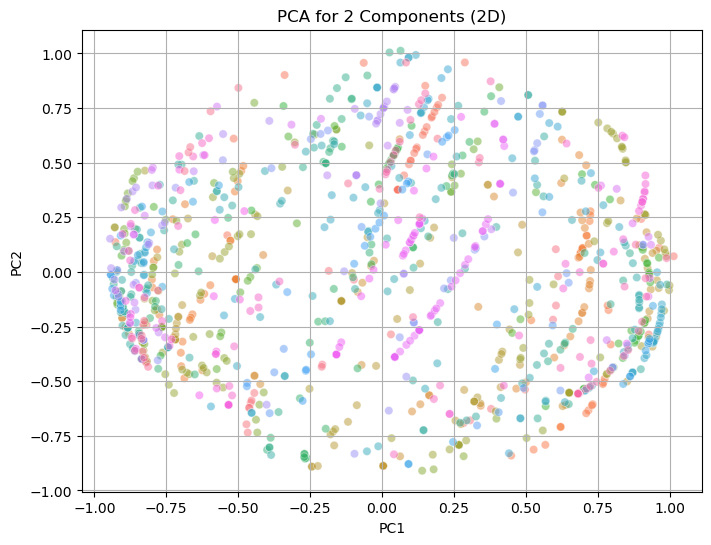

In [615]:
# Visualization for 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_with_pca_2d, hue=df_with_pca_2d['drugName'], alpha=0.5, legend=False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA for 2 Components (2D)')
plt.grid(True)
plt.show()

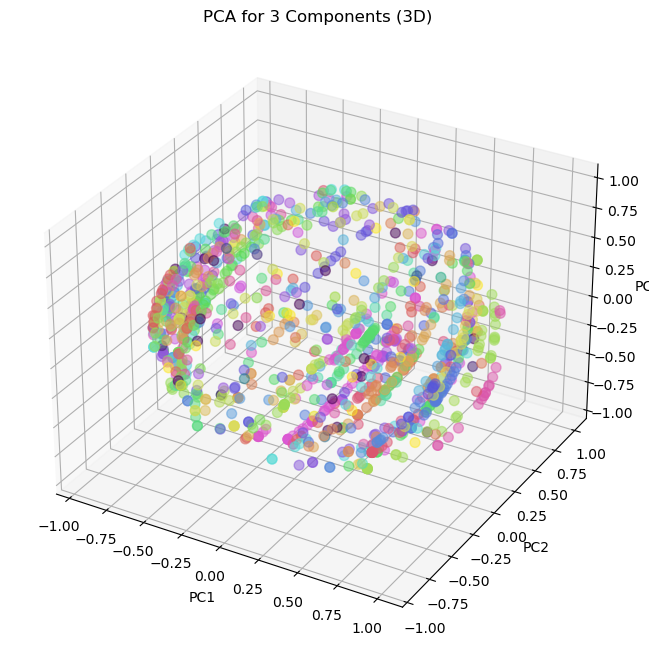

In [616]:
# Visualization for 3D
plt.figure(figsize=(16, 8))
ax = plt.axes(projection='3d')
# Define a colormap
palette = sns.color_palette("hls", len(df_with_pca_3d['drugName'].unique()))
colors = {k: v for k, v in zip(df_with_pca_3d['drugName'].unique(), palette)}

for name, group in df_with_pca_3d.groupby('drugName'):
    ax.scatter(group['PC1'], group['PC2'], group['PC3'], c=colors[name], label=name, s=50, alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA for 3 Components (3D)')

plt.show()

In [1157]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder

data = grouped_data.copy(deep=True)

features_scaled = scaler.fit_transform(data[['rating', 'usefulCount', 'negDrugNo', 'EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction']])

# Apply SVD to reduce dimensionality
svd = TruncatedSVD(n_components=8) # Choose the number of components
features_reduced = svd.fit_transform(features_scaled)


# Create a user-item matrix
user_item_matrix = data.pivot_table(index='condition', columns='drugName', values=['rating','usefulCount','negDrugNo','EaseOfUse','Effective','Price','Reviews','Satisfaction'], fill_value=0)

# Transpose the user-item matrix to have items as rows and users as columns
item_user_matrix = user_item_matrix.T

# Perform Singular Value Decomposition (SVD)
U, sigma, Vt = np.linalg.svd(item_user_matrix)

# Make predictions
predicted_ratings = np.dot(U[:, :len(sigma)], np.dot(np.diag(sigma), Vt))

# Convert the predicted ratings back to a DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=item_user_matrix.index, columns=item_user_matrix.columns)

# Generate top N recommendations for the specified condition
def get_top_n_recommendations(predictions, condition, n=3):
    if condition not in predictions.columns:
        return None
    else:
        return predictions.loc[:, condition].nlargest(n).index.tolist()
    
    

predicted_ratings_df

condition                          ADHD  Abnormal Uterine Bleeding  \
            drugName                                                 
EaseOfUse   Acebutolol     1.320016e-15              -4.228388e-18   
            Acetaminophen  2.396087e-16              -7.742288e-16   
            Acetazolamide -3.942024e-16               1.072047e-17   
            Acyclovir      6.922834e-16               6.740078e-16   
            Amikacin      -5.563854e-16              -1.141990e-15   
...                                 ...                        ...   
usefulCount Trimethoprim  -2.154527e-15               2.556982e-15   
            Triptorelin    7.905749e-16               2.934393e-16   
            Valacyclovir   8.474124e-15               4.143821e-15   
            Valsartan      5.584075e-15              -5.243202e-16   
            Verapamil      2.813028e-14              -7.972789e-15   

condition                          Acne  Actinic Keratosis  Addison's Disease  \
            drugName                                                            
EaseOfUse   Acebutolol    -6.262487e-16       7.612644e-15      -3.139410e-14   
            Acetaminophen  8.738670e-16       5.512003e-14      -1.418719e-15   
            Acetazolamide  1.195568e-15       1.175134e-13       1.497985e-13   
            Acyclovir     -2.730021e-16      -9.139173e-14      -2.795262e-14   
            Amikacin       1.112391e-16      -4.837224e-14      -2.929921e-14   
...                                 ...                ...                ...   
usefulCount Trimethoprim   1.530026e-15       1.486912e-13      -1.092876e-15   
            Triptorelin    1.527696e-15       1.331964e-17      -3.489656e-16   
            Valacyclovir  -5.722419e-15      -1.161913e-13       3.233525e-15   
            Valsartan     -6.736799e-15       1.000252e-14      -5.858486e-15   
            Verapamil     -2.657596e-15      -1.964297e-13      -6.120104e-15   

condition                  Adrenocortical Insufficiency  Agitated State  \
            drugName                                                      
EaseOfUse   Acebutolol                    -3.485016e-14    1.080299e-15   
            Acetaminophen                 -1.900628e-14    7.242471e-16   
            Acetazolamide                  1.130238e-13    6.923986e-17   
            Acyclovir                     -7.146284e-14    8.716037e-16   
            Amikacin                      -1.550829e-13   -4.388850e-16   
...                                                 ...             ...   
usefulCount Trimethoprim                  -5.224120e-14    1.589007e-15   
            Triptorelin                   -9.235086e-17    2.158702e-16   
            Valacyclovir                   6.008041e-14    2.556115e-15   
            Valsartan                      2.480221e-15    3.851086e-15   
            Verapamil                      6.700196e-14   -2.081668e-16   

condition                     Agitation  Alcohol Withdrawal  \
            drugName                                          
EaseOfUse   Acebutolol    -6.352904e-14       -2.107689e-15   
            Acetaminophen  2.074057e-14        3.747978e-15   
            Acetazolamide -5.705983e-14       -3.100713e-15   
            Acyclovir     -5.552403e-15       -9.873897e-16   
            Amikacin      -5.655372e-14        4.665322e-16   
...                                 ...                 ...   
usefulCount Trimethoprim   4.780898e-14        7.095886e-15   
            Triptorelin   -1.701034e-16        4.053135e-16   
            Valacyclovir  -4.139484e-14       -7.454107e-15   
            Valsartan      1.263399e-14        1.591175e-14   
            Verapamil     -6.040134e-14        8.326673e-16   

condition                  Allergic Reactions  ...           eve  \
            drugName                           ...                 
EaseOfUse   Acebutolol          -1.452831e-17  ... -4.571647e-15   
            Acetaminophen        4.

In [1158]:
# Prompt the user to input their condition
user_condition = input("Enter your condition: ")

# Check if the condition exists in the predictions
if user_condition not in predicted_ratings_df.columns:
    print("No recommendations available for the specified condition.")
else:
    # Get top N recommendations for the specified condition
    top_n = get_top_n_recommendations(predicted_ratings_df, user_condition)
    print(top_n)
    # Print the top 3 recommendations for the specified condition
    if top_n is None:
        print("No recommendations available for the specified condition.")
    else:
        print(f"Top 3 drug recommendations for condition '{user_condition}':")
        for drug in top_n:
            print("Drug Name:", drug[1])

Enter your condition: Pneumonia
[('Reviews', 'Azithromycin'), ('Reviews', 'Cefdinir'), ('Reviews', 'Levofloxacin')]
Top 3 drug recommendations for condition 'Pneumonia':
Drug Name: Azithromycin
Drug Name: Cefdinir
Drug Name: Levofloxacin


In [1162]:
grouped_data[(grouped_data['drugName']=='Cedax')]

,drugName,condition,rating,usefulCount,negDrugNo,EaseOfUse,Effective,Reviews,Price,Satisfaction


In [678]:
# Selecting relevant features for matrix factorization
X = df[['PC1', 'PC2', 'PC3']].values

# Fit the Truncated SVD
svd = TruncatedSVD(n_components=2)
X_transformed = svd.fit_transform(X)

X_transformed

array([[-0.80402973, -0.28574754],
       [-0.21740457,  0.28439644],
       [-0.04487198, -0.42982595],
       ...,
       [-0.61873541,  0.39422298],
       [-0.66446759,  0.62678767],
       [-0.68135606,  0.2644798 ]])

In [680]:
# Calculate the item features matrix
item_features = np.dot(np.diag(svd.singular_values_), svd.components_)

item_features

array([[ 1.95523396e+01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.49635811e+01, -8.28572373e-14]])

In [681]:
# Function to get top N recommendations based on a given condition
def get_top_n_recommendations(df, condition, n=3):
    condition_code = le_condition.transform([condition])[0]
    
    drug_ratings = {}
    for i, row in df.iterrows():
        if row['condition'] == condition:
            drug_ratings[row['drugName']] = np.dot(X_transformed[row['drugCode']], X_transformed[condition_code])
    
    # Sort the drugs by their ratings
    top_n_drugs = sorted(drug_ratings.items(), key=lambda x: x[1], reverse=True)[:n]
    return top_n_drugs

In [682]:
grouped_data['condition'].unique()

array(['High Blood Pressure', 'Muscle Pain', 'Pain', 'Sciatica', 'eve',
       'Edema', 'Epilepsy', 'Glaucoma', 'Hydrocephalus',
       'Mountain Sickness / Altitude Sickness', 'Pseudotumor Cerebri',
       'Seizure Prevention', 'Cold Sores', 'Herpes Simplex',
       'Herpes Simplex, Mucocutaneous/Immunocompetent Host',
       'Herpes Simplex, Mucocutaneous/Immunocompromised Host',
       'Herpes Simplex, Suppression', 'Herpes Zoste', 'Mononucleosis',
       'Not Listed / Othe', 'Psoriasis', 'Urinary Tract Infection',
       'Anxiety and Stress', 'Burning Mouth Syndrome',
       'Chronic Myofascial Pain', 'Cyclic Vomiting Syndrome',
       'Depression', 'Dysautonomia', 'Hyperhidrosis', 'Insomnia',
       'Interstitial Cystitis', 'Irritable Bowel Syndrome',
       'Migraine Prevention', 'Neurotic Depression',
       'Persistent Depressive Disorde', 'Post Traumatic Stress Disorde',
       'Pudendal Neuralgia', 'Reflex Sympathetic Dystrophy Syndrome',
       'Urinary Incontinence', 'Vulvo

In [683]:
# Example usage
user_condition = 'Back Pain'
top_recommendations = get_top_n_recommendations(df, user_condition)
print(f"Top 3 drugs for {user_condition}:")
for drug, rating in top_recommendations:
    print(f"{drug}: {rating:.2f}")

Top 3 drugs for Back Pain:
Duloxetine: 0.08
Diclofenac: 0.01
Ketoprofen: 0.01


In [684]:
grouped_data[grouped_data['condition']=='Back Pain'].sort_values(by='rating', ascending=False)

,drugName,condition,rating,negDrugNo,EaseOfUse,Effective,Reviews,Price,Satisfaction
525,Flurbiprofen,Back Pain,9.666667,-54.0,4.66,4.75,7.00,-99.49,4.42
610,Ketoprofen,Back Pain,9.000000,-42.0,4.36,4.38,9.88,-25.46,4.38
91,Aspirin,Back Pain,7.600000,-116.0,3.92,3.72,12.10,-12.11,3.61
366,Diclofenac,Back Pain,7.355556,-85.0,4.25,3.90,152.33,-157.19,3.58
569,Ibuprofen,Back Pain,7.285714,-38.0,4.30,3.98,48.45,-154.05,3.73
444,Duloxetine,Back Pain,7.263158,-175.0,4.01,3.71,2367.67,-100.74,3.28
597,Indomethacin,Back Pain,7.000000,-75.0,4.40,3.66,133.67,-15.99,3.60
1094,Tramadol,Back Pain,6.703704,-214.0,4.24,3.20,154.50,-26.89,3.02
798,Naproxen,Back Pain,5.800000,-53.0,4.21,3.33,132.33,-43.33,3.12


In [65]:
aggregated_df.to_csv("Project Data/aggregated_df.csv", index=False)

In [37]:
pivot_df = aggregated_df.pivot_table(index=['condition','drugName'], values='review', aggfunc=lambda x: ', '.join(x))
pivot_df

review
condition                                   drugName                                                       
45</span> users found this comment helpful. Vitamin B12   "Vitam B12 really helps with depression and ha...
ADHD                                        Amantadine    "Primary related symptom was mild cognitive im...
                                            Amphetamine   "I have taken Adderall 30 mg XR for a little o...
                                            Armodafinil   "This drug nuvigil I took for 3 days only half...
                                            Atomoxetine   "Strattera was my first treatment after I was ...
...                                                                                                     ...
zen Shoulde                                 Diclofenac    "This medication has been a God send for me.  ...
                                            Ibuprofen     "I&#039;ve found that taking ibuprofen (200 mg...
                                            Indomethacin                                        "It works."
                                            Nabumetone    "The only side effect I have experienced with ...
                                            Naproxen      "Very little relief.  I finished PT and after ...

[2761 rows x 1 columns]

In [80]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import re

def clean_doc(row):
    #Converting doc to lowercase
    doc = row['review'][0]
    
    doc = doc.lower()
    
    doc = re.sub(r"\W+|_|\\|/"," ",doc)
    
    #Tokenizing the docs into words
    word_tokens = word_tokenize(doc)
    
    #Removing stopwords
    filtered_doc = [w for w in word_tokens if not w in stop_words]
    
    #Joining all words into a string with spaces
    cleaned_doc = ' '.join(filtered_doc)

    #Return cleaned document
    return cleaned_doc


In [83]:
aggregated_df['review'] 
# = aggregated_df.apply(clean_doc, axis=1)
# aggregated_df

0         
1         
2         
3         
4         
        ..
69012     
69013     
69014     
69015     
69016     
Name: review, Length: 69017, dtype: object

In [76]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import linear_kernel


# Text data preprocessing
tfidf = TfidfVectorizer(stop_words='english')


tfidf_matrix = tfidf.fit_transform(aggregated_df['review'])

tfidf_matrix.shape

(69017, 40104)

In [77]:
cosine_sim_review = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim_review

MemoryError: Unable to allocate 35.5 GiB for an array with shape (69017, 69017) and data type float64

In [ ]:


# Categorical data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['rating', 'usefulCount', 'negDrugNo', 'noConditionTreated']),
        ('cat', OneHotEncoder(), ['drugName', 'condition'])
    ],
    remainder='passthrough'
)



# Combine the transformers into a single pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95))  # 95% of the variance
])

# Fit and transform the data
X = pipeline.fit_transform(df.drop(columns=["review", "date", "DBID"]))

# Find similar items
knn = NearestNeighbors(metric='cosine')
knn.fit(X)

# Function to get the most similar items
def get_recommendations(condition, k=5):
    condition_df = df[df['condition'] == condition]
    condition_X = pipeline.transform(condition_df.drop(columns=["review", "date", "DBID"]))
    distances, indices = knn.kneighbors(condition_X)
    return indices[0][:k], distances[0][:k]

# Get recommendations for a specific condition
condition = "Eye Redness"
rec_indices, distances = get_recommendations(condition)

# Output recommendations
print("Recommendations:")
recommended_drugs = []
for i, distance in zip(rec_indices, distances):
    recommended_drugs.append(df.iloc[i]['drugName'])
    print(f"Index: {i}, Distance: {distance}, Data: {df.iloc[i]}")

# Possible list of conditions based on the recommended drugs
possible_conditions = df[df['drugName'].isin(recommended_drugs)]['condition'].unique()

print("\nPossible list of conditions based on the recommended drugs:")
print(possible_conditions)
